In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [19]:
df = pd.read_csv('Salary_Vs_Experience_DirectReports.csv')
df

,Salary,Years_Of_Experience,Num_of_Direct_Reports
0,157351,22,19
1,149491,19,10
2,139619,18,13
3,128640,29,29
4,93497,8,0
5,70208,4,0
6,64703,3,0
7,169772,21,11
8,158759,17,15
9,138086,15,12


<Axes: >

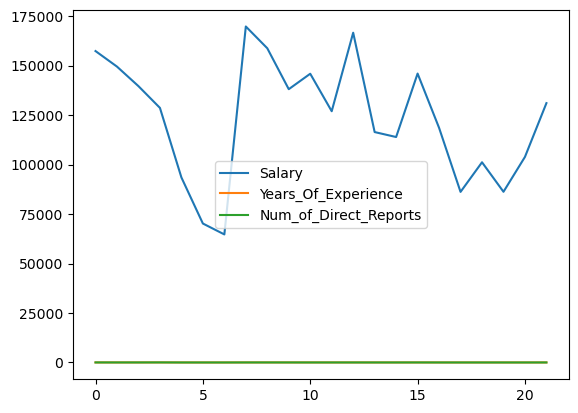

In [20]:
df.plot()

In [21]:
y = df['Salary'] 
X = df[['Years_Of_Experience','Num_of_Direct_Reports']]
X = sm.add_constant(X)

In [22]:
model = sm.OLS(y,X)
fit = model.fit()

In [23]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     29.64
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.44e-06
Time:                        12:33:00   Log-Likelihood:                -242.36
No. Observations:                  22   AIC:                             490.7
Df Residuals:                      19   BIC:                             494.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.027e+04   9880.354      6.100      0.000    3.96e+04     8.1e+04
Years_Of_Experience    5491.3615   1090.129      5.037      0.000    3209.695    7773.028
Num_of_Direct_Reports -1752.7373    997.937     -1.756      0.095   -3841.443     335.968
==============================================================================
Omnibus:                        2.813   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.202
Skew:                          -0.347   Prob(JB):                        0.548
Kurtosis:                       3.910   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=True)

In [30]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm)
fit = model.fit()
fit.summary()

C:\Users\reece\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     24.13
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           6.24e-05
Time:                        12:37:05   Log-Likelihood:                -164.01
No. Observations:                  15   AIC:                             334.0
Df Residuals:                      12   BIC:                             336.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.666e+04   1.03e+04      5.480      0.000    3.41e+04    7.92e+04
Years_Of_Experience    5984.8289   1175.678      5.091      0.000    3423.246    8546.411
Num_of_Direct_Reports -2657.1247   1079.550     -2.461      0.030   -5009.263    -304.986
==============================================================================
Omnibus:                        0.685   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.617
Skew:                           0.094   Prob(JB):                        0.734
Kurtosis:                       2.024   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Fitted Salary')

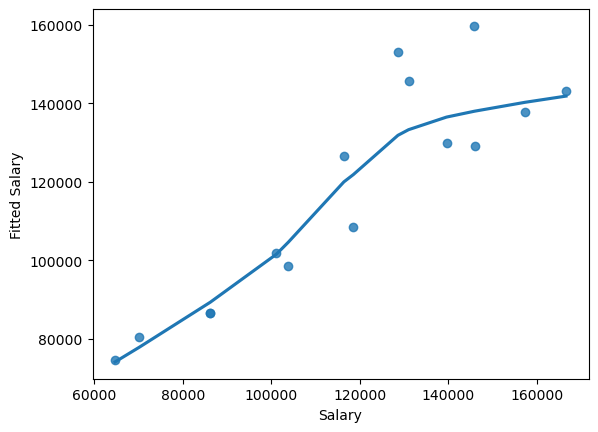

In [35]:
import seaborn as sns
y_train_fitted = fit.fittedvalues
sns.regplot(x=y_train,y=fit.fittedvalues,lowess=True)
plt.xlabel('Salary')
plt.ylabel('Fitted Salary')

Text(0, 0.5, 'Fitted Salary')

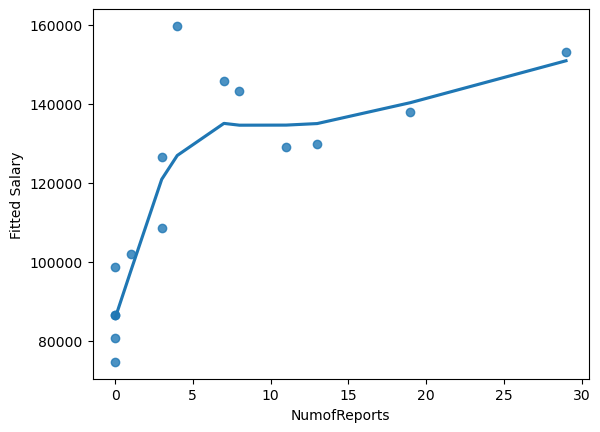

In [36]:
sns.regplot(x=X_train['Num_of_Direct_Reports'],y=fit.fittedvalues,lowess=True)
plt.xlabel('NumofReports')
plt.ylabel('Fitted Salary')

Text(0, 0.5, 'Fitted Salary')

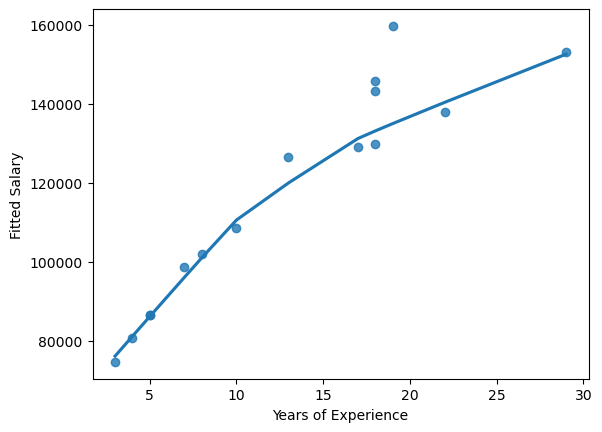

In [37]:
sns.regplot(x=X_train['Years_Of_Experience'],y=fit.fittedvalues,lowess=True)
plt.xlabel('Years of Experience')
plt.ylabel('Fitted Salary')

In [38]:
import statsmodels.stats.api as sms
sms.linear_harvey_collier(fit)

TtestResult(statistic=-0.5246486908181863, pvalue=0.6102375407333775, df=11)

In [39]:
import numpy as np
student_residuals = pd.Series(np.abs(fit.get_influence().resid_studentized_internal))

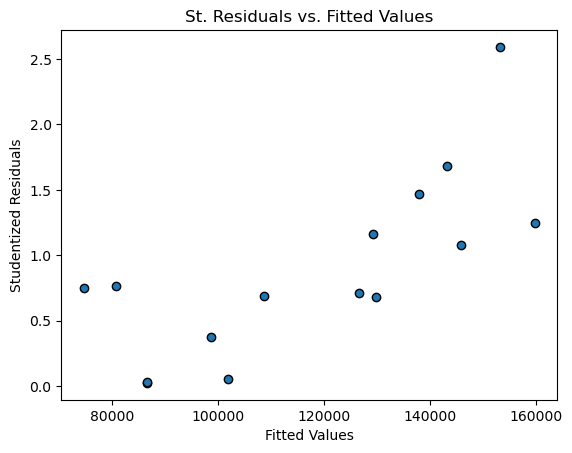

In [40]:
fig, ax = plt.subplots()
ax.scatter(fit.fittedvalues, student_residuals, edgecolors = 'k')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('St. Residuals vs. Fitted Values')
plt.show()

In [41]:
# fulfilled regression assumptions

In [42]:
# 2.Statistical independence of the errors

Text(0, 0.5, 'Residuals')

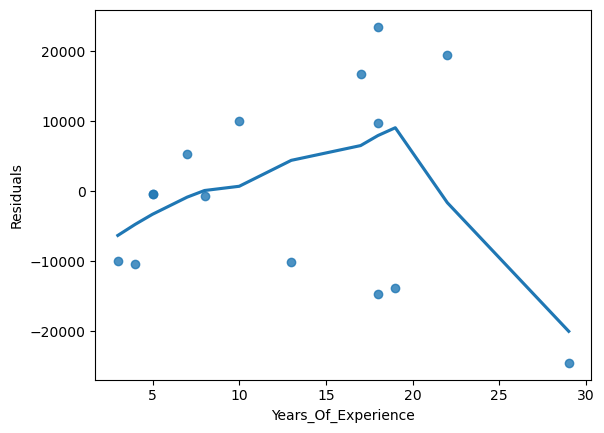

In [45]:
sns.regplot(x=X_train['Years_Of_Experience'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

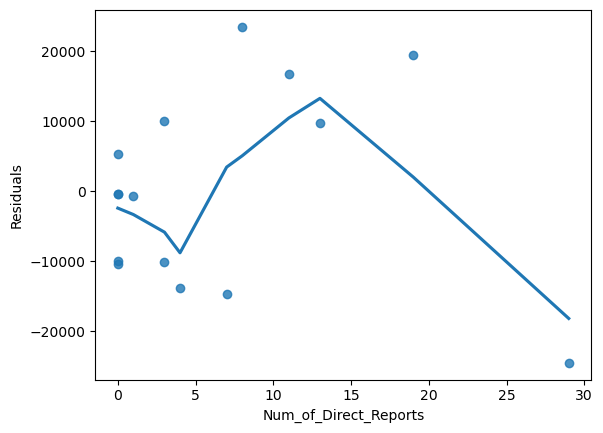

In [46]:
sns.regplot(x=X_train['Num_of_Direct_Reports'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

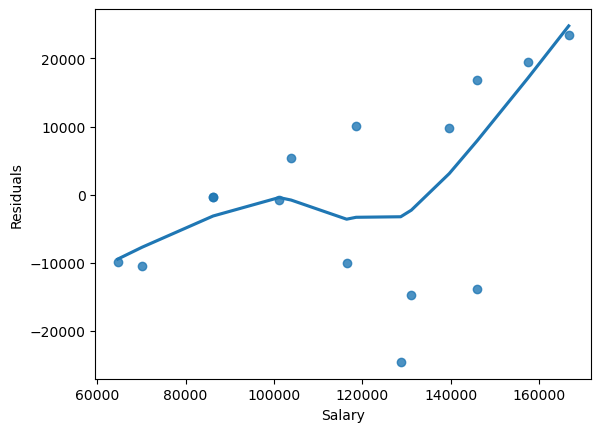

In [47]:
sns.regplot(x=y_train,y=fit.resid,lowess=True)
plt.ylabel('Residuals')

In [48]:
fit.summary()

C:\Users\reece\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     24.13
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           6.24e-05
Time:                        12:52:34   Log-Likelihood:                -164.01
No. Observations:                  15   AIC:                             334.0
Df Residuals:                      12   BIC:                             336.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.666e+04   1.03e+04      5.480      0.000    3.41e+04    7.92e+04
Years_Of_Experience    5984.8289   1175.678      5.091      0.000    3423.246    8546.411
Num_of_Direct_Reports -2657.1247   1079.550     -2.461      0.030   -5009.263    -304.986
==============================================================================
Omnibus:                        0.685   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.617
Skew:                           0.094   Prob(JB):                        0.734
Kurtosis:                       2.024   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# DW = 2.318
# residuals are independent 

In [50]:
# (iii) Homoscedasticity (constant variance) of the errors

Text(0, 0.5, 'Residuals')

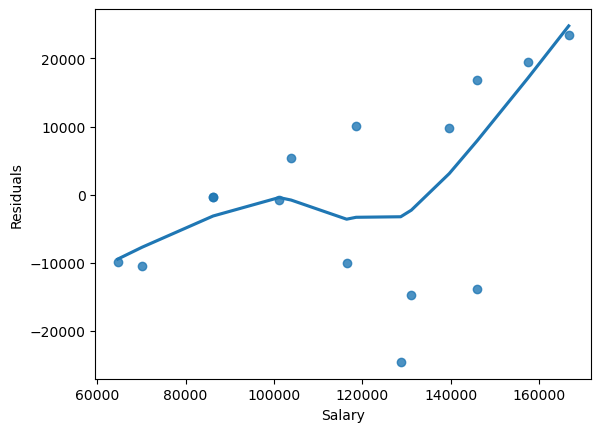

In [52]:
sns.regplot(x=y_train,y=fit.resid,lowess=True)
plt.xlabel('Salary')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

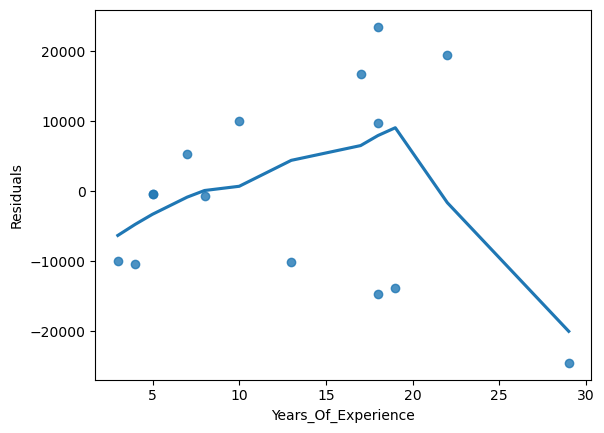

In [53]:
sns.regplot(x=X_train['Years_Of_Experience'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

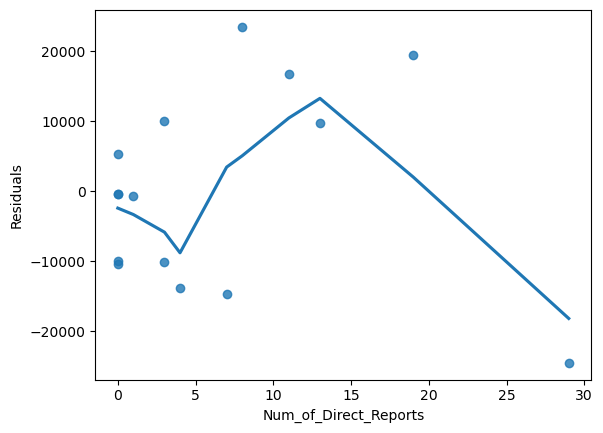

In [54]:
sns.regplot(x=X_train['Num_of_Direct_Reports'],y=fit.resid,lowess=True)
plt.ylabel('Residuals')

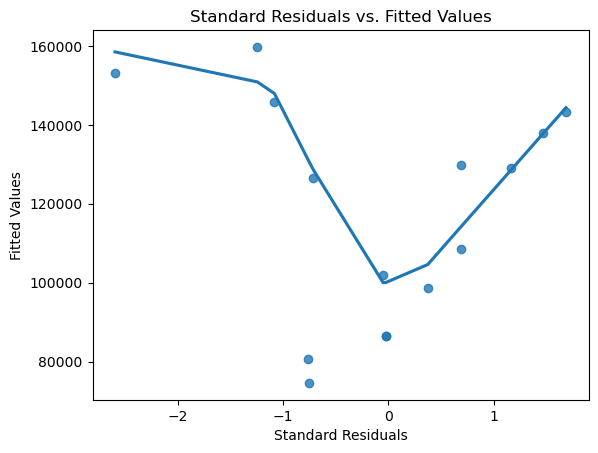

In [56]:
influence = fit.get_influence()
influence_summary = influence.summary_frame()
influence_summary.columns

sns.regplot(x=influence_summary['standard_resid'],y=fit.fittedvalues,lowess=True)
plt.title('Standard Residuals vs. Fitted Values')
plt.xlabel('Standard Residuals')
plt.ylabel('Fitted Values')
plt.show()

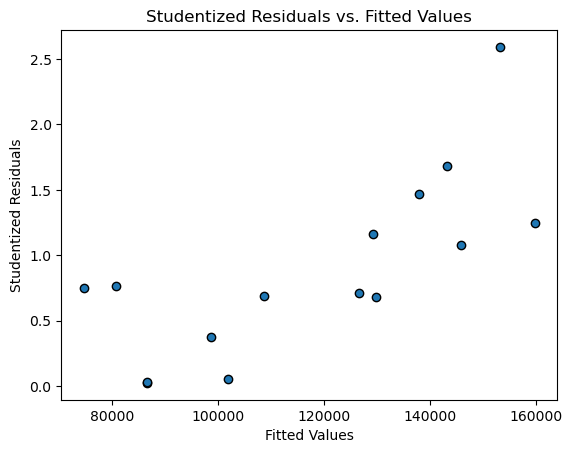

In [57]:
student_residuals = pd.Series(np.abs(fit.get_influence().resid_studentized_internal))

fig, ax = plt.subplots()
ax.scatter(fit.fittedvalues, student_residuals, edgecolors = 'k')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Studentized Residuals vs. Fitted Values')
plt.show()

In [58]:
# (iv) Normality of the error distribution:

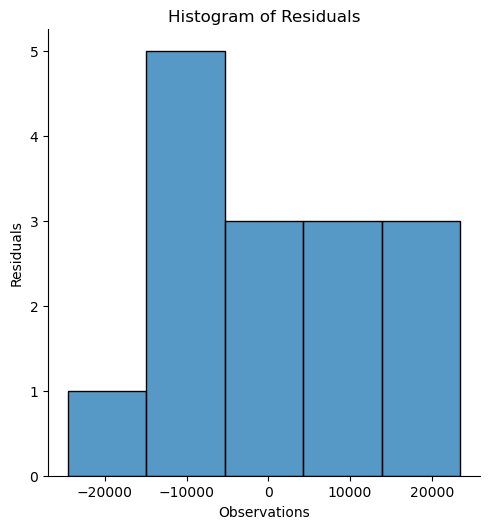

In [62]:
sns.displot(fit.resid)
plt.title('Histogram of Residuals')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()
# not normally distrubuted
# no bell shape curve

In [65]:
fit.summary()
# Prob(Omnibus): 0.710
# Jarque-Bera (JB): 0.617
# In between 0 and 1, for both test
# no normality of the residuals 
# not really a lack of normality 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     24.13
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           6.24e-05
Time:                        13:01:17   Log-Likelihood:                -164.01
No. Observations:                  15   AIC:                             334.0
Df Residuals:                      12   BIC:                             336.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.666e+04   1.03e+04      5.480      0.000    3.41e+04    7.92e+04
Years_Of_Experience    5984.8289   1175.678      5.091      0.000    3423.246    8546.411
Num_of_Direct_Reports -2657.1247   1079.550     -2.461      0.030   -5009.263    -304.986
==============================================================================
Omnibus:                        0.685   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.617
Skew:                           0.094   Prob(JB):                        0.734
Kurtosis:                       2.024   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# (v) No multi-collinearity among the predictor variables

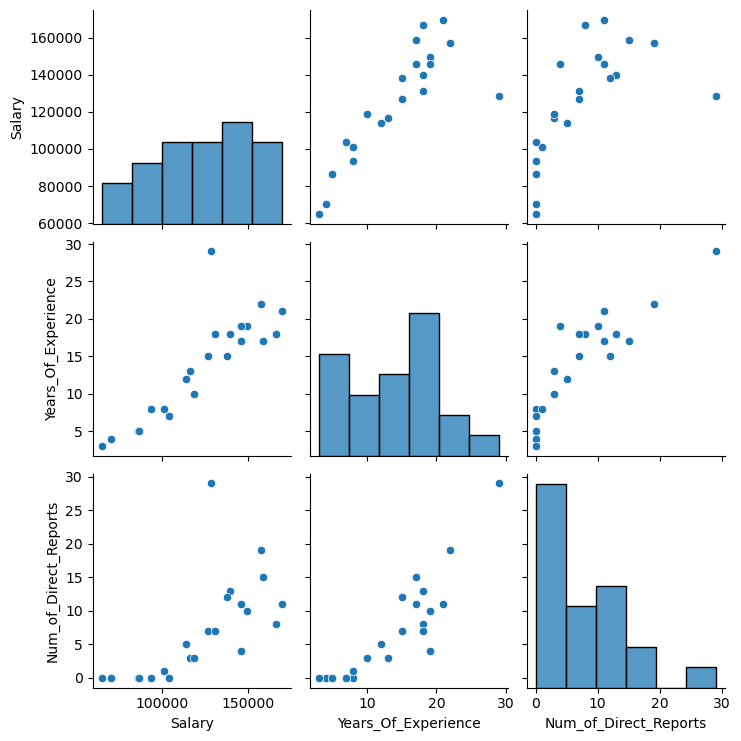

In [67]:
sns.pairplot(df)

In [68]:
# Calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# First 3 varibles
print(variance_inflation_factor(X_train.values, 0))
print(variance_inflation_factor(X_train.values, 1))
print(variance_inflation_factor(X_train.values, 2))

6.976849514627343
5.068706131372675
5.068706131372675


In [72]:
# All vairables below 10, we do not have multicollinearity